\title{\fontsize{24pt}{30pt} Uczenie maszynowe i sztuczna inteligencja w finansach \break Prognoza cen samochodów}  
\vspace{50pt}  
\author{Alan Śliwiński \\ 89575 \and name2 \\ album2 \and imie \\ album3}  
\date{28 stycznia 2024}  
\maketitle

\vspace{75pt}  
\large{\textbf tutaj wstawić opis projektu Lorem ipsum dolor sit amet stet vel. Amet et et sed dolor sit amet justo molestie nonumy invidunt kasd. Dolor clita eu justo liber magna autem consetetur sed delenit illum. Et in ea feugait ut ipsum dolor dolore at. Ea illum eos sadipscing sit. Esse dolores at lorem sea eirmod at doming sadipscing erat nonumy praesent. Et voluptua justo amet erat ipsum vero dolor. Magna et quis stet praesent sadipscing magna. Dolor ad magna.}  
\vspace{25pt}  
\renewcommand{\contentsname}{Spis treści}

\tableofcontents

\pagebreak

# Biblioteki i dane

notatka

In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

notatka

In [2]:
df = pd.read_csv("otomoto.csv")
df = df.drop(columns=["OPIS", "OSTATNIA_AKTUALIZACJA"])

notatka

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151360 entries, 0 to 151359
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TYTUŁ                  151360 non-null  object 
 1   ROK_PRODUKCJI          133434 non-null  float64
 2   PRZEBIEG_KM            133428 non-null  float64
 3   POJEMNOŚĆ_SILNIKA_CM3  151147 non-null  float64
 4   PALIWO                 151360 non-null  object 
 5   MIASTO                 151360 non-null  object 
 6   WOJEWODZTWO            151360 non-null  object 
 7   CENA                   151360 non-null  int64  
 8   WALUTA                 151360 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 10.4+ MB


notatka

In [4]:
df = df[df.WALUTA != 'EUR']

# Exploratory data analysis

notatka

## Dane numeryczne

notatka

In [5]:
df.describe().astype(int)

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
count,133414,133408,151128,151340
mean,2012,163790,1937,58185
std,6,92676,836,65134
min,1937,1,480,1250
25%,2009,94296,1469,17900
50%,2012,179010,1798,35900
75%,2017,224000,1997,74999
max,2023,1943000,7990,1966770


notatka

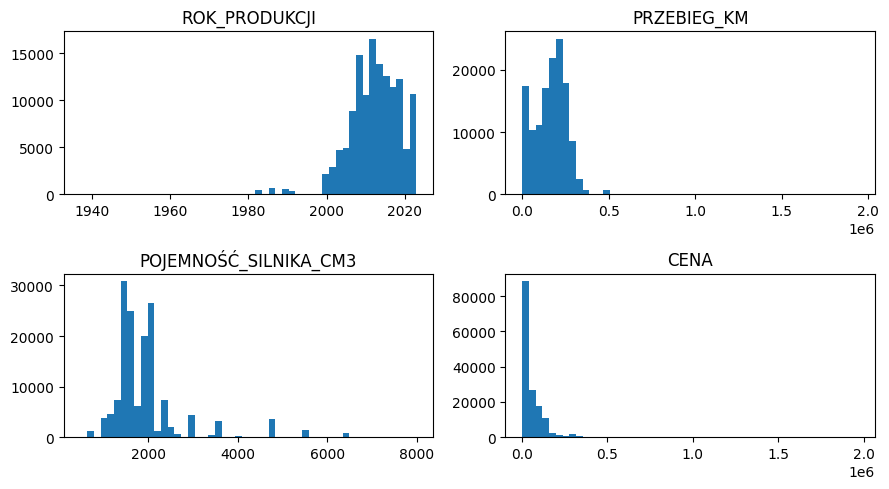

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(9, 5))
for i, stat in enumerate(("ROK_PRODUKCJI", "PRZEBIEG_KM", "POJEMNOŚĆ_SILNIKA_CM3", "CENA")):
    div, mod = divmod(i, 2)
    ax[div, mod].hist(df[stat], bins=50)
    ax[div, mod].set_title(stat)
plt.tight_layout()
plt.show()

notatka

In [7]:
df.corr(numeric_only=True)

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
ROK_PRODUKCJI,1.000000,-0.640512,-0.017783,0.609888
PRZEBIEG_KM,-0.640512,1.000000,0.087809,-0.641578
POJEMNOŚĆ_SILNIKA_CM3,-0.017783,0.087809,1.000000,0.220893
CENA,0.609888,-0.641578,0.220893,1.000000


notatka

## Dane kategoryczne

notatka

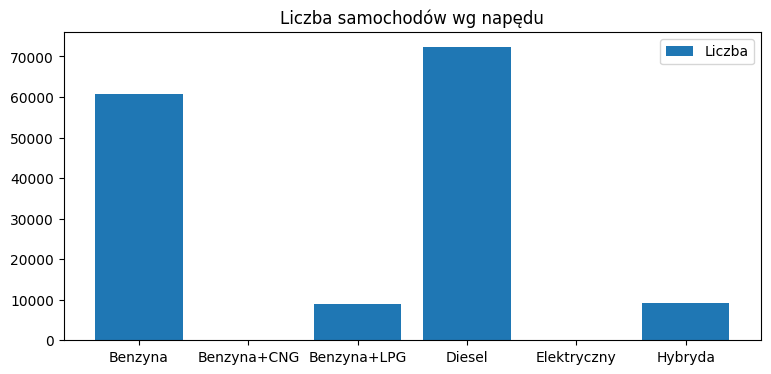

In [8]:
naped = df.groupby("PALIWO")[["CENA"]].count()
plt.figure(figsize=(9, 4))
plt.bar(naped.index, naped.CENA)
plt.legend(["Liczba"])
plt.title("Liczba samochodów wg napędu")
plt.show()

notatka

In [9]:
woj_data = (
    df.groupby("WOJEWODZTWO")
    .CENA.describe()
    .round(2)
    .sort_values("count", ascending=False)

)
woj_data[["count", "mean", "std"]]

,count,mean,std
WOJEWODZTWO,,,
Mazowieckie,26650.0,83636.14,68158.56
Wielkopolskie,25600.0,44594.14,58038.32
Dolnośląskie,19225.0,43793.56,41021.80
Małopolskie,16082.0,42221.08,48355.71
Świętokrzyskie,11331.0,71837.12,30127.82
Śląskie,11193.0,79787.73,108573.26
Lubuskie,7625.0,42991.48,24576.86
Lubelskie,6852.0,46321.08,36391.10
Zachodniopomorskie,5937.0,40753.79,36539.75


notatka

In [10]:
woj_shp = gpd.read_file("wojewodztwa.zip")[["JPT_NAZWA_", "geometry"]]
woj_shp.JPT_NAZWA_ = woj_shp.JPT_NAZWA_.str.capitalize()

notatka

In [11]:
woj_plot = woj_shp.merge(
        woj_data, how="outer", left_on="JPT_NAZWA_", right_on="WOJEWODZTWO"
    ).dropna().set_index("JPT_NAZWA_")

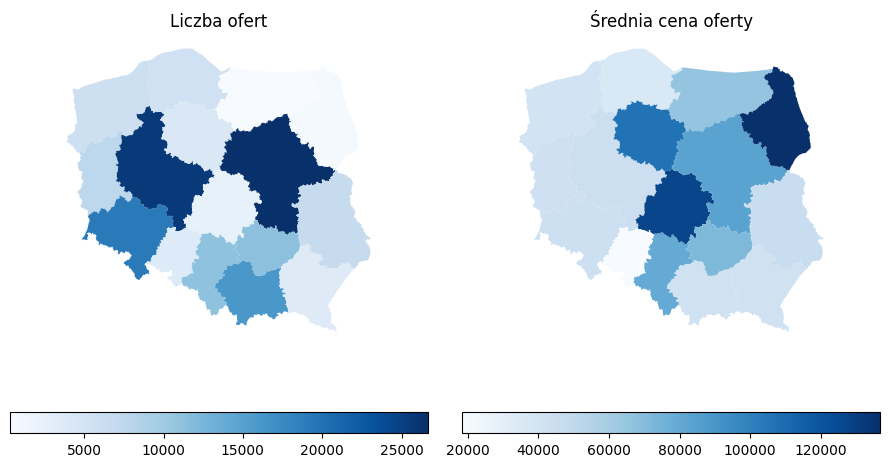

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
ax1 = woj_plot.plot("count", ax=ax[0], legend=True, cmap="Blues", legend_kwds={"orientation": "horizontal"})
ax1.set_axis_off()
ax1.set_title("Liczba ofert")
ax2 = woj_plot.plot("mean", ax=ax[1], legend=True, cmap="Blues", legend_kwds={"orientation": "horizontal"})
ax2.set_axis_off()
ax2.set_title("Średnia cena oferty")
plt.tight_layout()
plt.show()

notatka

In [13]:
df.loc[0, 'TYTUŁ']

'Skoda Superb 2.0 Comfort'

notatka

In [14]:
df.insert(1, 'MARKA', df.TYTUŁ.str.split(' ').str[0])

In [15]:
marki = df.groupby("MARKA").CENA.describe().round(2).sort_values("count", ascending=False)
marki[['count', 'mean', 'std']].head(10)

,count,mean,std
MARKA,,,
Ford,16232.0,38581.29,25463.85
Volkswagen,14343.0,33141.09,33817.38
Opel,11316.0,19765.17,15144.27
Toyota,9312.0,28684.19,25234.61
BMW,9179.0,99011.68,109428.93
Jeep,8589.0,150863.91,23737.61
Audi,8234.0,115730.76,104048.98
Skoda,6935.0,37460.26,35298.70
Mercedes-Benz,6459.0,104704.07,98882.41


notatka

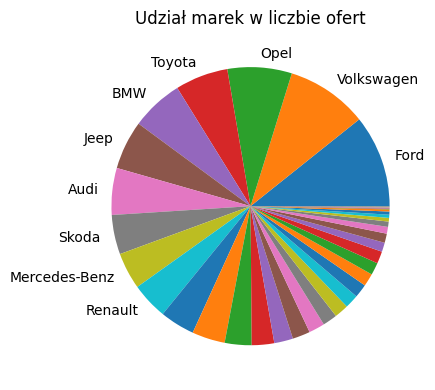

In [16]:
labels = [label if i < 10 else "" for i, label in enumerate(marki.index)]
plt.figure(figsize=(6,4))
plt.pie(marki['count'], labels=labels)
plt.title('Udział marek w liczbie ofert')
plt.tight_layout()
plt.show()

notatka

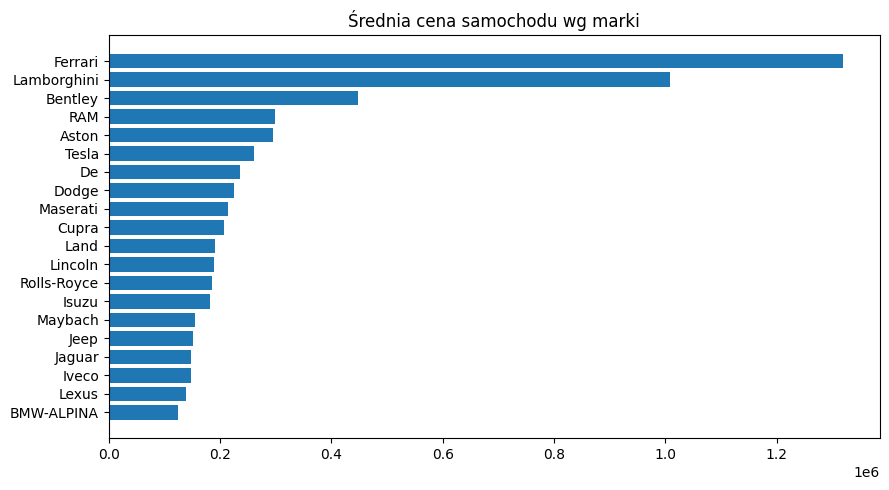

In [17]:
marki = marki.sort_values("mean").tail(20)
plt.figure(figsize=(9, 5))
plt.barh(marki.index, marki["mean"])
plt.title("Średnia cena samochodu wg marki")
plt.tight_layout()
plt.show()

notatka

# Model

notatka

## Budowa transformatora i predyktora

notatka

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import set_config
set_config(display="text")

notatka

In [19]:
num_cols = ["ROK_PRODUKCJI", "PRZEBIEG_KM", "POJEMNOŚĆ_SILNIKA_CM3"]
cat_cols = ["MARKA", "PALIWO","WOJEWODZTWO"]

pipeline

In [20]:
preprocessor = ColumnTransformer([
    ("numerical", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())]
        ), num_cols),
    ("categorical", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])
default_model = Pipeline([("preprocessor", preprocessor), ("regressor", LinearRegression())])

## Przygotowanie i trening

notatka

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df = df.drop(columns=['TYTUŁ', 'MIASTO', 'WALUTA'])
y = df.CENA
x = df.drop(columns=['CENA'])

dla zobrazowania małe sety danych

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.05, test_size=0.01, random_state=42)

In [24]:
default_model.fit(X=x_train, y=y_train)
pass

notatka

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

notatka

In [26]:
y_pred = default_model.predict(X=x_train)

In [27]:
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae, r2

(19256.167848500572, 0.744092478959515)

notatka

## Przeszukiwanie siatki

In [28]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

notatka

In [29]:
from sklearn.model_selection import GridSearchCV

notatka

In [30]:
param_grid = [
    {"regressor": [LinearRegression()]},
    {"regressor": [LogisticRegression(random_state=42)]},
    {"regressor": [KNeighborsRegressor()]},
    {"regressor": [SVR()]},
    {"regressor": [DecisionTreeRegressor(random_state=42)]},
    {"regressor": [RandomForestRegressor(random_state=42)]},
]


In [31]:
gscv_model = GridSearchCV(estimator=default_model, param_grid=param_grid, n_jobs=-1)

In [32]:
gscv_model.fit(X=x_train, y=y_train)
pass

In [33]:
pd.DataFrame(gscv_model.cv_results_).set_index("rank_test_score").sort_index()[
    ["param_regressor", "mean_test_score"]
]

,param_regressor,mean_test_score
rank_test_score,,
1,RandomForestRegressor(random_state=42),0.938634
2,DecisionTreeRegressor(random_state=42),0.909744
3,KNeighborsRegressor(),0.905837
4,LogisticRegression(random_state=42),0.873001
5,LinearRegression(),0.731528
6,SVR(),-0.121414


znaleziono lepszy randomforestregressor

In [34]:
y_pred = gscv_model.predict(x_train)

In [35]:
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae, r2

(976.0301943302412, 0.9912686902554559)

notatka

## Klasyfikator głosujący

notatka

In [36]:
from sklearn.ensemble import VotingRegressor

notatka

In [37]:
regr = VotingRegressor(
    estimators=[
        ("forest", RandomForestRegressor(random_state=42)),
        ("knn", KNeighborsRegressor()),
        ("tree", DecisionTreeRegressor(random_state=42)),
    ],
)
voting_model = Pipeline([("preprocessor", preprocessor), ("regressor", regr)])

notatka

In [38]:
voting_model.fit(x_train, y_train)
pass

In [39]:
y_pred = voting_model.predict(x_train)

In [40]:
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae, r2

(1196.9951266742087, 0.9878689266331786)

notatka

## Fine Tuning

notatka

In [41]:
param_grid = {
    # 'regressor__forest__n_estimators': [50, 100, 200],
    'regressor__forest__max_depth': [None, 5],
    # 'regressor__knn__n_neighbors': [2, 5, 10],
    # 'regressor__tree__max_depth': [5, 25, 50],
    # 'regressor__tree__min_samples_split': [2, 10, 20]
}

In [42]:
voting_gscv = GridSearchCV(estimator=voting_model, param_grid=param_grid, n_jobs=-1)

notatka

In [43]:
voting_gscv.fit(x_train, y_train)
pass

notatka

In [44]:
voting_gscv.best_params_

{'regressor__forest__max_depth': None}

notatka

In [45]:
y_pred = voting_gscv.predict(x_train)

In [46]:
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae, r2

(1196.9951266742087, 0.9878689266331786)

notatka

# Podsumowanie

notatka

notatka

# Bibliografia

notatka

dane: OTOMOTO.pl

wpisy do bibliotek:  
- matplotlib
- pandas
- geopandas
- sklearn
- numpy
  